In [1]:
# Import necessary libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Set up Splinter browser
browser = Browser('chrome', executable_path=ChromeDriverManager().install())

# Visit the website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

# Create a BeautifulSoup object from the HTML of the website
page_html = browser.html
page_soup = soup(page_html, 'html.parser')

# Extract all rows of data from the HTML table
data_rows = page_soup.find_all('tr')

# Create an empty list to store the scraped data
scraped_data = []

# Loop through the rows of data and extract the values from each cell
for row in data_rows:
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    scraped_data.append(row_data)

# Create a Pandas DataFrame using the scraped data and a list of column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
data_df = pd.DataFrame(scraped_data, columns=column_names)

data_df = data_df.iloc[1:]

# Confirm that the DataFrame was created successfully
print(data_df.head())

# Convert the "terrestrial_date" column to datetime64 type
data_df['terrestrial_date'] = data_df['terrestrial_date'].astype('datetime64[ns]')

# Convert the "id" column to object type
data_df['id'] = data_df['id'].astype('object')

# Convert the "sol", "ls", and "month" columns to int type
data_df['sol'] = data_df['sol'].astype('int64')
data_df['ls'] = data_df['ls'].astype('int64')
data_df['month'] = data_df['month'].astype('int64')

# Convert the "min_temp" and "pressure" columns to float type
data_df['min_temp'] = data_df['min_temp'].astype('float64')
data_df['pressure'] = data_df['pressure'].astype('float64')

# Confirm that the data types are correct
print(data_df.dtypes)

   id terrestrial_date sol   ls month min_temp pressure
1   2       2012-08-16  10  155     6    -75.0    739.0
2  13       2012-08-17  11  156     6    -76.0    740.0
3  24       2012-08-18  12  156     6    -76.0    741.0
4  35       2012-08-19  13  157     6    -74.0    732.0
5  46       2012-08-20  14  157     6    -74.0    740.0
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


There are 12 months on Mars.
There are 1867 Martian days worth of data in the dataset.


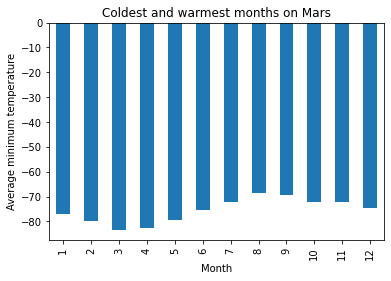

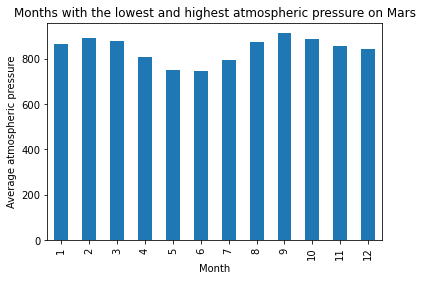

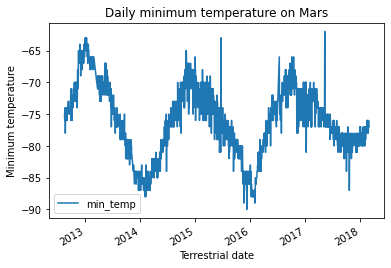

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt

# How many months exist on Mars?
num_months = data_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_mars_days = data_df['sol'].nunique()
print(f"There are {num_mars_days} Martian days worth of data in the dataset.")

# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Find the average the minimum daily temperature for all of the months.
avg_min_temp_by_month = data_df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart.
avg_min_temp_by_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('Average minimum temperature')
plt.title('Coldest and warmest months on Mars')
plt.show()

# Which months have the lowest and the highest atmospheric pressure on Mars?
# Find the average the daily atmospheric pressure of all the months.
avg_pressure_by_month = data_df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart.
avg_pressure_by_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('Average atmospheric pressure')
plt.title('Months with the lowest and highest atmospheric pressure on Mars')
plt.show()

# About how many terrestrial (Earth) days exist in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
data_df.plot(x='terrestrial_date', y='min_temp')
plt.xlabel('Terrestrial date')
plt.ylabel('Minimum temperature')
plt.title('Daily minimum temperature on Mars')
plt.show()

# Save as a CSV
data_df.to_csv("mars_data.csv")

#Quit scraping browser
browser.quit()